# SQL RESULTS PROJECTS

This analysis are the sql results of the projects and have been checked for error and fixed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

imported libraries above.

In [3]:
try:
    df_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
except FileNotFoundError:
    df_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv')

In [7]:
try:
    df_chicago = pd.read_csv("/datasets/project_sql_result_04.csv")
except FileNotFoundError:
    df_chicago = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_04.csv')

In [5]:
try:
    df_airport = pd.read_csv("/datasets/project_sql_result_07.csv")
except FileNotFoundError:
    df_airport = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_07.csv')

downloaded datasets above.

In [3]:
df_trips.info

<bound method DataFrame.info of                        company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]>

basic info of the dataset above.

In [4]:
df_trips.duplicated().sum()

0

no duplicates above in this dataset.

In [5]:
df_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

no missing values above in this dataset.

In [6]:
df_trips.dtypes

company_name    object
trips_amount     int64
dtype: object

datatypes listed above.

In [7]:
df_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


the top 10 companies listed above.

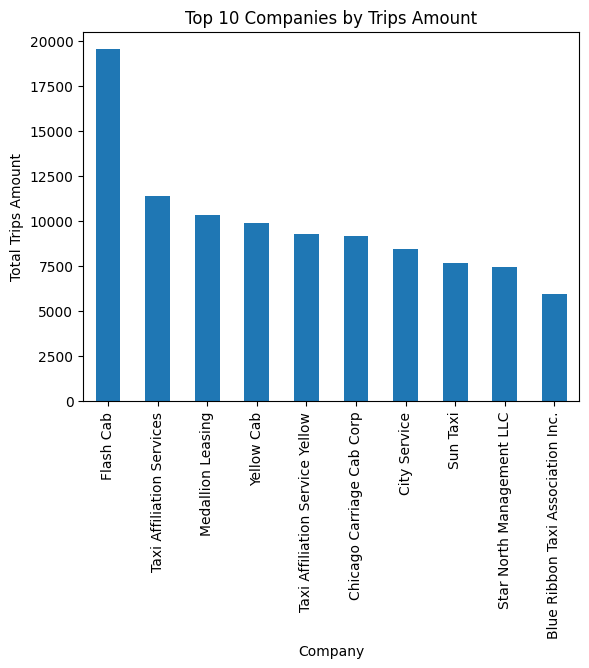

In [8]:
top_10_companies = df_trips.groupby('company_name')['trips_amount'].sum().nlargest(10)

top_10_companies.plot(kind='bar')
plt.title('Top 10 Companies by Trips Amount')
plt.xlabel('Company')
plt.ylabel('Total Trips Amount')
plt.show()

boxplot above shows the top 10 companies.

In [9]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


basic info of the dataset above.

In [10]:
df_chicago.duplicated().sum()

0

no duplicates in this dataset above.

In [11]:
df_chicago.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

no missing values in this dataset above.

In [12]:
df_chicago.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

showing the datatypes for the dataset above.

In [13]:
df_chicago.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


the top 10 locations based on average trips above.

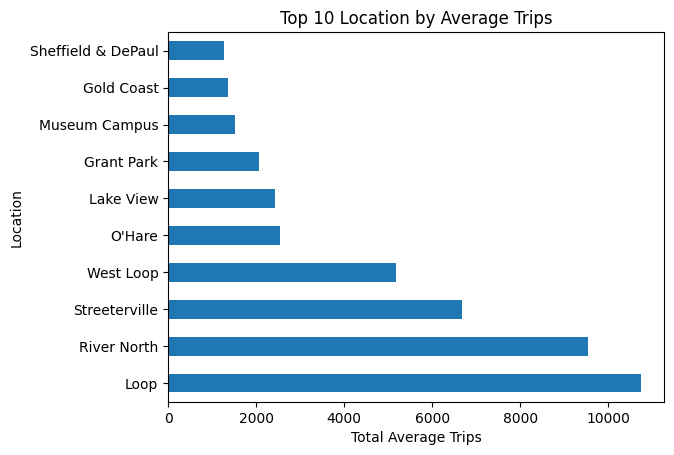

In [14]:
top_10_locations = df_chicago.groupby('dropoff_location_name')['average_trips'].sum().nlargest(10)

top_10_locations.plot(kind='barh')
plt.title('Top 10 Location by Average Trips')
plt.xlabel('Total Average Trips') 
plt.ylabel('Location')
plt.show()

showing distribution of the dataset for top 10 locations for average trips above.

In [15]:
df_airport.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

datatypes for the dataset listed above.

In [16]:
df_airport.duplicated().sum()

197

there are 197 duplicates for the dataset above.

In [17]:
df_airport.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

no missing values in this dataset above.

In [18]:
df_airport['start_ts'] = pd.to_datetime(df_airport['start_ts'], format='%Y-%m-%d %H:%M:%S')

changed the format of start_ts to datetime format above.

In [19]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


checking to make sure start_ts is in datetime format above.

In [20]:
df_airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


a summary descriptive statistics for this dataset above.

In [21]:
real_duration = df_airport.loc[df_airport['duration_seconds'] > 900]

median_duration_minute = real_duration['duration_seconds'].median()

df_airport.loc[df_airport['duration_seconds'] < 900, 'duration_seconds'] = median_duration_minute


added more columns to make a better analysis.

In [22]:
df_airport['duration_minute'] = df_airport['duration_seconds'] / 60

df_airport['duration_hour'] = df_airport['duration_minute'] / 60

df_airport['pick_up_day'] = df_airport['start_ts'].dt.day_name()

df_airport['pick_up_date'] = pd.to_datetime(df_airport['start_ts']).dt.date.astype('datetime64')

df_airport['pick_up_time'] = pd.to_datetime(df_airport['start_ts'], format='%H-%M-%S').dt.time

df_airport.head()

,start_ts,weather_conditions,duration_seconds,duration_minute,duration_hour,pick_up_day,pick_up_date,pick_up_time
0,2017-11-25 16:00:00,Good,2410.0,40.166667,0.669444,Saturday,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920.0,32.000000,0.533333,Saturday,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543.0,25.716667,0.428611,Saturday,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512.0,41.866667,0.697778,Saturday,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440.0,24.000000,0.400000,Saturday,2017-11-11,07:00:00


In [23]:
df_airport.describe()

,duration_seconds,duration_minute,duration_hour
count,1068.000000,1068.000000,1068.000000
mean,2088.922285,34.815371,0.580256
std,746.069201,12.434487,0.207241
min,1018.000000,16.966667,0.282778
25%,1440.000000,24.000000,0.400000
50%,1980.000000,33.000000,0.550000
75%,2580.000000,43.000000,0.716667
max,7440.000000,124.000000,2.066667


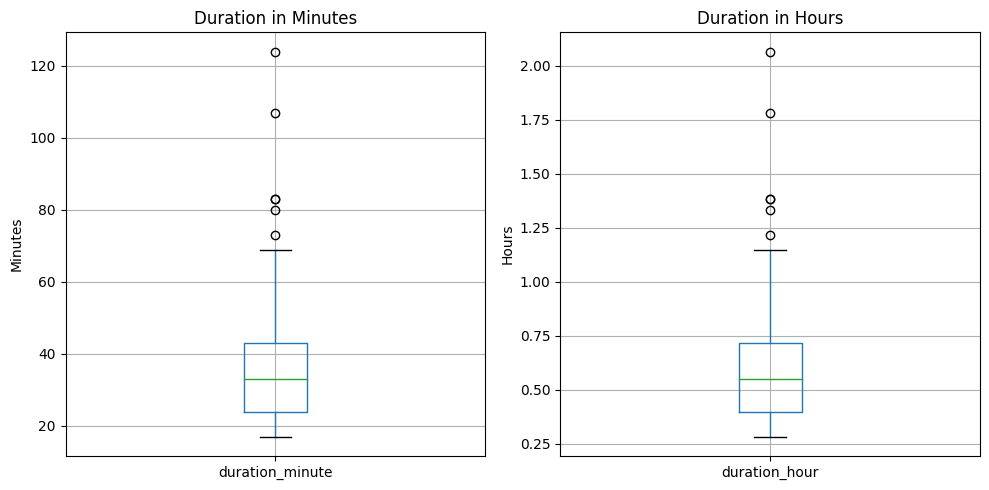

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_airport.boxplot(column='duration_minute', ax=axes[0])
axes[0].set_title('Duration in Minutes')
axes[0].set_ylabel('Minutes')

df_airport.boxplot(column='duration_hour', ax=axes[1])
axes[1].set_title('Duration in Hours')
axes[1].set_ylabel('Hours')

plt.tight_layout()
plt.show()

the above boxplots show duration in minutes and hours.

Hypothesis:

H0: Average trip duration from Loop to Airport does not change when it rained on Saturday.

H1: Average trip duration from Loop to Airport changes when it rained on Saturday.

In [25]:
sunny = df_airport.loc[(df_airport['weather_conditions'] == 'Good') & (df_airport['pick_up_day'] == 'Saturday')]
rainy = df_airport.loc[(df_airport['weather_conditions'] == 'Bad') & (df_airport['pick_up_day'] == 'Saturday')]

variance_sunny = sunny['duration_hour']
variance_rainy = rainy['duration_hour']


A commonly used significance level is 0.05 (5%), which means you are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

In [26]:
alpha = 0.05
result = st.ttest_ind(variance_sunny, variance_rainy, equal_var=True)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Average trip duration from Loop to Airport changed when it rained on Saturday')
else:
    print('Average trip duration from Loop to Airport did not changed when it rained on Saturday')


p-value: 1.4673086945855461e-12
Average trip duration from Loop to Airport changed when it rained on Saturday


CONCLUSION:

The top 10 company names for most trips amount are Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc.

The top 10 locations for average trips are Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.

THERE WAS ONE HYPOTHESIS TESTED:

Average trip duration from Loop to Airport changed when it rained on Saturday.